In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv('Titanic-Dataset.csv')

In [91]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
df = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis=1)

In [93]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [94]:
survived_col = df['Survived']

In [95]:
def calculate_survivor(dataframe):
    total_survior = 0
    for i in dataframe:
        total_survior = total_survior + int(i)
    return total_survior

In [96]:
print(calculate_survivor(survived_col))

342


<Axes: xlabel='Survived', ylabel='count'>

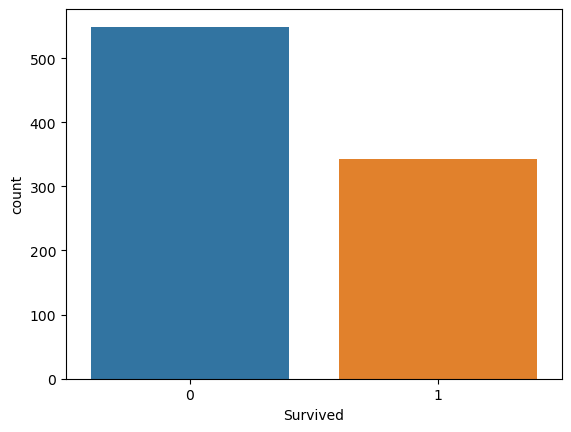

In [97]:
sns.countplot(x=df['Survived'])

In [98]:
survivor_dict = {0: 'Died', 1:'Saved'}

In [99]:
survived_col2 = survived_col.map(survivor_dict)

In [100]:
survived_col2

0       Died
1      Saved
2      Saved
3      Saved
4       Died
       ...  
886     Died
887    Saved
888     Died
889    Saved
890     Died
Name: Survived, Length: 891, dtype: object

<Axes: xlabel='Survived', ylabel='count'>

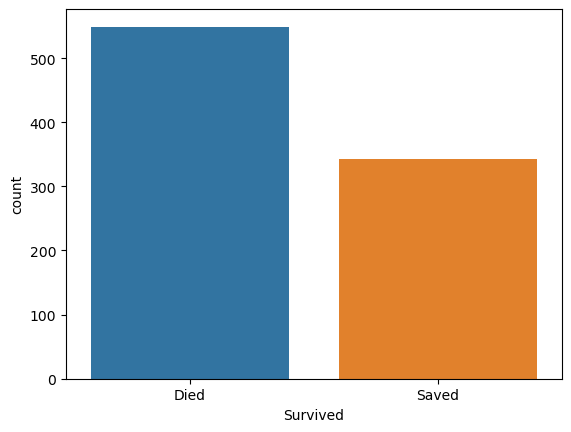

In [101]:
sns.countplot(x=survived_col2)

In [102]:
gender_split = df.groupby('Sex')

In [103]:
male_split = gender_split.get_group('male')
male_split

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
4,0,3,male,35.0,8.0500
5,0,3,male,NaN,8.4583
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750
...,...,...,...,...,...
883,0,2,male,28.0,10.5000
884,0,3,male,25.0,7.0500
886,0,2,male,27.0,13.0000
889,1,1,male,26.0,30.0000


In [104]:
female_split = gender_split.get_group('female')
female_split.shape[0]

314

In [105]:
male_survive_rate = ((calculate_survivor(male_split['Survived']))/891) * 100
male_survive_rate

12.2334455667789

In [106]:
female_survive_rate = ((calculate_survivor(female_split['Survived']))/891) * 100
female_survive_rate

26.15039281705948

In [107]:
pivot = pd.pivot_table(df,values=['Survived'],index=['Pclass','Sex'],aggfunc='sum')

In [108]:
survival_rate = (pivot/891) * 100

In [109]:
survival_rate

Survived
Pclass Sex              
1      female  10.213244
       male     5.050505
2      female   7.856341
       male     1.907969
3      female   8.080808
       male     5.274972

<Axes: ylabel='Pclass,Sex'>

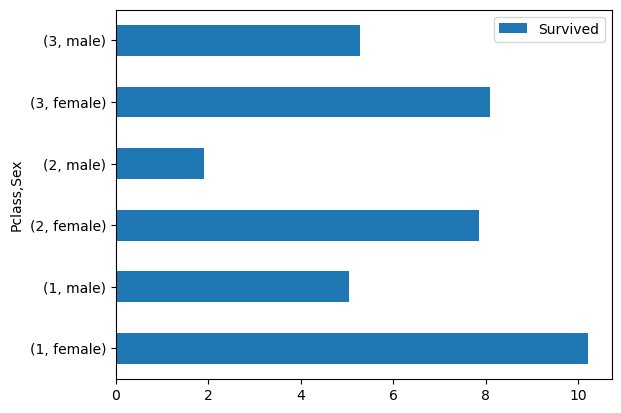

In [110]:
survival_rate.plot.barh()

In [111]:
df['Age'] = pd.cut(x=df['Age'], bins=[0,10,20,30,40,50,60,70,80])

In [112]:
df['Age'].min()

Interval(0, 10, closed='right')

In [113]:
df['Age'].max()

Interval(70, 80, closed='right')

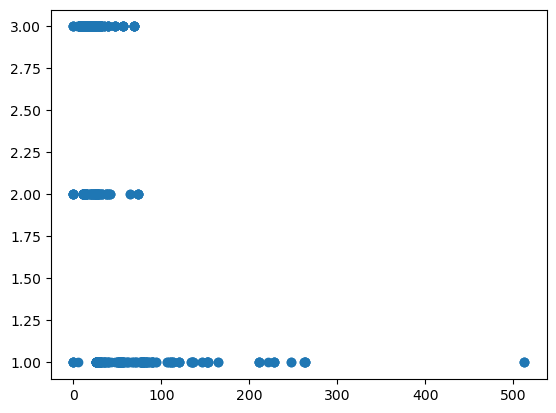

In [114]:
plt.scatter(x = [df['Fare']], y= [df['Pclass']])

In [ ]:
target = df[]